# Final report


# Final submition

 ## place : 1691
  ## username: achiadg
   ## photo
    ![Image of github's cat](/images/final_score.PNG)

# The Data

Variable | Description
----------|--------------
Loan_ID | Unique Loan ID
Gender | Male/ Female
Married | Applicant married (Y/N)
Dependents | Number of dependents
Education | Applicant Education (Graduate/ Under Graduate)
Self_Employed | Self employed (Y/N)
ApplicantIncome | Applicant income
CoapplicantIncome | Coapplicant income
LoanAmount | Loan amount in thousands
Loan_Amount_Term | Term of loan in months
Credit_History | credit history meets guidelines
Property_Area | Urban/ Semi Urban/ Rural
Loan_Status | Loan approved (Y/N)


# Setup

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


now we will import libraries we will use later, in the prediction process.

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Pre processing
We first read the data set to df.
We are doing pre processing on some fields of the data set for the ***Two Predictions*** in order to conclude which parameters have the most or least influence on the expected result. we are doing this by checking for the parameters we suspect.  By testing few aspects of the diffrent field. for some fields we are checking for each value how many people that posses this attribute got the loan and how many didnt, so we can infer the influence of this attributes on the chance for a spesific person to get the loan.
We did this for the fields: ApplicantIncome, LoanAmount , Credit_History , Gender, Self_employed, Education.
for the fields  ApplicantIncome, LoanAmount we build histograma to see the distribution of this field among the population.

After importing the library, we read the dataset using function read_csv().

In [6]:
df = pd.read_csv("./train.csv") #Reading the dataset in a dataframe using Pandas
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We look at summary of numerical fields by using the describe() function

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We want to plot the histogram of ApplicantIncome in order to see the distribution of this field among the population.

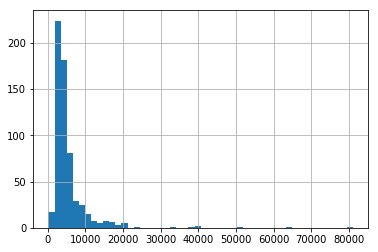

In [8]:
df['ApplicantIncome'].hist(bins=50)

We will do the same for LoanAmount.

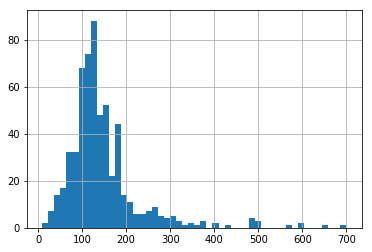

In [9]:
df['LoanAmount'].hist(bins=50)

Now we will  do the same for Categorial fields.


Frequency Table for Credit History:

In [10]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:

In [11]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789



Probability of getting loan for each Education class:

In [12]:
education_temp = df.pivot_table(values='Loan_Status',index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
education_temp

,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940



Probability of getting loan for each Self_Employed class:

In [14]:
self_employed_temp = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
self_employed_temp


,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927




Now we can plot the Probability of getting loan for each Credit History class and the Probability of getting loan for each Self_Employed class and the Gender class.

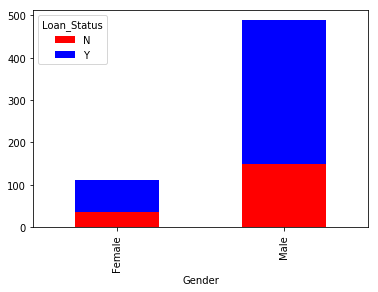

In [15]:
temp4 = pd.crosstab(df['Gender'], df['Loan_Status'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

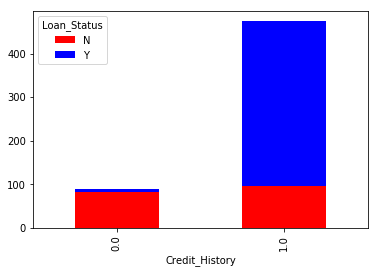

In [16]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

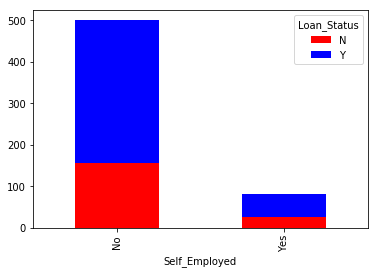

In [17]:
self_employed_temp2 = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
self_employed_temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Now we will see how much N/A is in each field of the df data set.

In [18]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We will impute the missing values of the Self_Employed field as “No” as there is a high probability of success.

In [19]:
df['Self_Employed'].fillna('No',inplace=True)

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [20]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [21]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [22]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

Now we will impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History.

In [23]:
df['Loan_Amount_Term'].fillna(360, inplace=True)
df['Credit_History'].fillna(1, inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Married'].fillna('Yes', inplace=True) 
df['Gender'].fillna('Male', inplace=True) 

In [24]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Building a Predictive Model in Python

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code:

In [25]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [27]:
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


Next, we will import the required module. Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores. 

In [28]:
#Import models from scikit learn module:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import KFold

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

# Tuning parameters
Now we will build our model using the classification_model(model, data, predictors, outcome) function.
The tuning parameters we did in this algorhitm is n_neighbors we set to be 13 and weights to be uniform.
We did this because we wanted the weight of each neighbor to be the same because we didnt want the distance from the neighbor to become factor. We chose n_neighbors to be 13 because we wanted to have enough neighbors so the prediction will be more accurate but not to many because it harms the accuracy when we take to many points.
moreover we chose an odd number so the number of the neighbors that got the loan will be diffrent than the number of the neighbors that didnt got the loan.



# Description of the algorithm
We used the KNN algorithm for predict the loan_status. this algorithm is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [29]:
outcome_var = 'Loan_Status'
model = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform')
predictor_var = ['LoanAmount' ,'Credit_History' , 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 71.173%
Cross-Validation Score : 68.237%


Now we can read the test Data set and use the Loan_ID field because he is required to submition in the csv file we will submit.

In [30]:
df_test = pd.read_csv("./test.csv")
df_loan_ids = df_test['Loan_ID']

We will omit the Loan_ID field.
And now we will impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History and LoanAmount.
Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. This can be done using the following code.


In [31]:
df_test['LoanAmount'].fillna(df_test[df_test['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
df_test['Loan_Amount_Term'].fillna(360, inplace=True)
df_test['Credit_History'].fillna(1, inplace=True)
df_test['Gender'].fillna('Male', inplace=True) 
df_test['Married'].fillna('Yes', inplace=True) 
df_test['Dependents'].fillna(0, inplace=True)
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i].astype(str))
df_test = df_test.drop('Loan_ID' , 1)

We will see that there is no Nulls in the df_test now.

In [32]:
 df_test.apply(lambda x: sum(x.isnull()),axis=0) 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

We will use just the required field in the df_test for the prediction which are: 'LoanAmount' ,'Credit_History' , 'Property_Area' .

In [33]:
df_test = df_test[['LoanAmount' ,'Credit_History' , 'Property_Area']]
df_test

,LoanAmount,Credit_History,Property_Area
0,110.0,1.0,2
1,126.0,1.0,2
2,208.0,1.0,2
3,100.0,1.0,2
4,78.0,1.0,2
5,152.0,1.0,2
6,59.0,1.0,1
7,147.0,0.0,0
8,280.0,1.0,2
9,123.0,1.0,1


Now we will predict the Loan_Status according to our model.

In [34]:
result = model.predict(df_test)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

We will convert the result 0 or 1 to 'Y' or 'N' in order to fit the expected result.

In [35]:
result = ['Y' if res == 1 else 'N' for res in result]
result

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y'

Now we will write the result to the submission file.

In [37]:
df_to_write = {'Loan_ID' : df_loan_ids , 'Loan_Status' : result}
df_to_write = pd.DataFrame(df_to_write)
df_to_write.to_csv("Sample_Submission1.csv")

# code file reference and excel file reference

[link to code!](https://github.com/achiadg/ex4/tree/master/prediction1.ipynb)

[link to output!](https://github.com/achiadg/ex2/tree/master/Sample_Submission1.csv)

# print screen of the prediction score

![Image of github's cat](/images/prediction1_score.PNG)


# Now for prediction 2

# tuning parameters
Now we will build our model using the classification_model(model, data, predictors, outcome) function. The tuning parameters we did in this algorhitm is gamma we set to be 0.001 and C to be 100 and degree to be 3. We chose gamma to be small enough because we want the algorithm to be accurate as we can but no to small because the accrate is reducing. C is a penalty parameter of the error term and we chose him to be 100, Degree is the Degree of the polynomial kernel function, we chose it to be 3 because we saw that degree 3 is very accurate.  

# Description of the algorithm
We used the SVM algorithm for predict the loan_status.this is supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [48]:
outcome_var = 'Loan_Status'
model = svm.SVC(gamma = 0.001, C = 100, degree = 3)
predictor_var = ['LoanAmount' ,'Credit_History' , 'Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.596%
Cross-Validation Score : 78.830%


Now we will predict the Loan_Status according to our model.

In [49]:
result = model.predict(df_test)
result

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

We will convert the result 0 or 1 to 'Y' or 'N' in order to fit the expected result.

In [50]:
result = ['Y' if res == 1 else 'N' for res in result]
result

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

Now we will write the result to the submission file.

In [51]:
df_to_write = {'Loan_ID' : df_loan_ids , 'Loan_Status' : result}
df_to_write = pd.DataFrame(df_to_write)
df_to_write.to_csv("Sample_Submission2.csv")

# code file reference and excel file reference

[link to code!](https://github.com/achiadg/ex4/tree/master/prediction2.ipynb)

[link to output!](https://github.com/achiadg/ex2/tree/master/Sample_Submission2.csv)

# print screen of the prediction score

![Image of github's cat](/images/prediction2_score.PNG)
